In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os.path
import os 
import csv
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [3]:
#Trazendo os dados para o python
data = pd.read_excel('listings.xlsx')
df = data.loc[(data.state=='DC')&(data.city=='Washington')]


In [4]:
#Selecionando somente as colunas que queremos trabalhar com e tirando os sinais de moedas 
colunas = ["latitude", "longitude", "property_type","bathrooms", "bedrooms", "beds", "price","extra_people","minimum_nights", "review_scores_rating","cancellation_policy"]
df = df.loc[:,colunas]

df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.extra_people = df.extra_people.str.replace('$', '')


df['price']=df['price'].astype(float)
df['extra_people']= df['extra_people'].astype(float)
df = df.dropna()



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlacao: -0.11977850029420414
Correlacao: -0.13265110792733373
Correlacao: 0.5263197092853233
Correlacao: 0.6104477984168931
Correlacao: 0.566826558048037
Correlacao: 0.1633593478911218
Correlacao: 0.034239469945253315
Correlacao: 0.051161156394228885


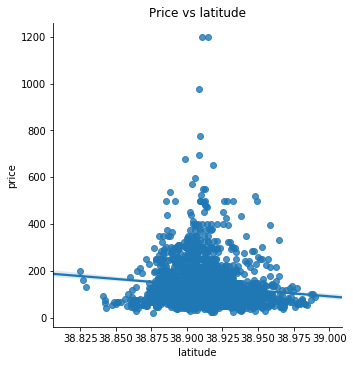

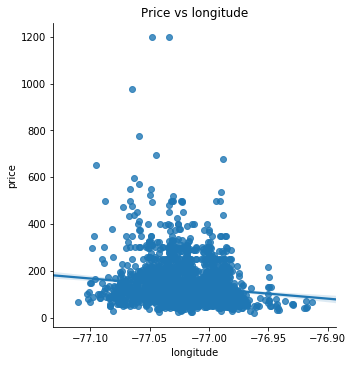

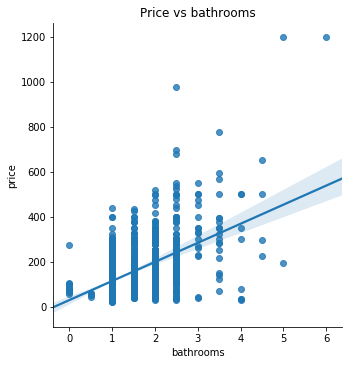

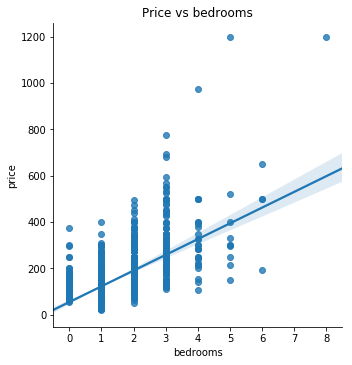

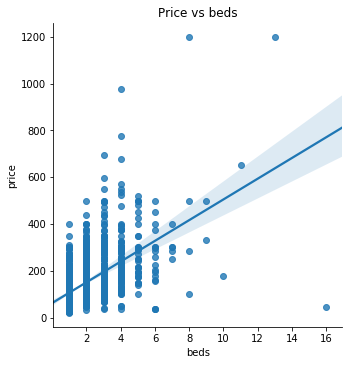

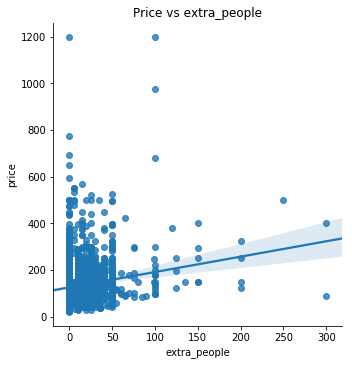

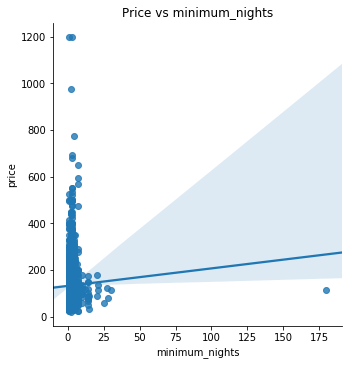

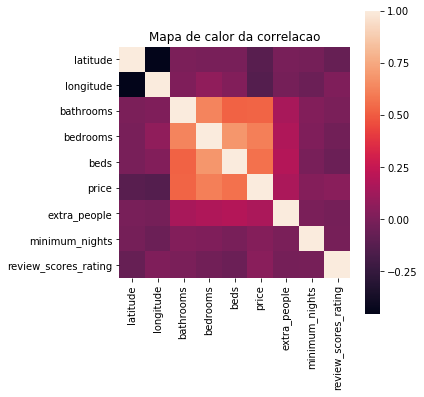

In [5]:
#criando uma funcao
colunas_quant= ["latitude", "longitude","bathrooms", "bedrooms", "beds","extra_people","minimum_nights", "review_scores_rating"]

def funcao_corr(lista):
    for x in colunas_quant:
        sns.lmplot(x = x, y = 'price', data = df)
        plt.title('Price vs {0}'.format(x))
        print('Correlacao: {0}'.format(df.price.corr(df[x])))
        
        
funcao_corr(colunas_quant)
        
matrix = df.corr()
sns.heatmap(matrix, square = True);
plt.title('Mapa de calor da correlacao');
        

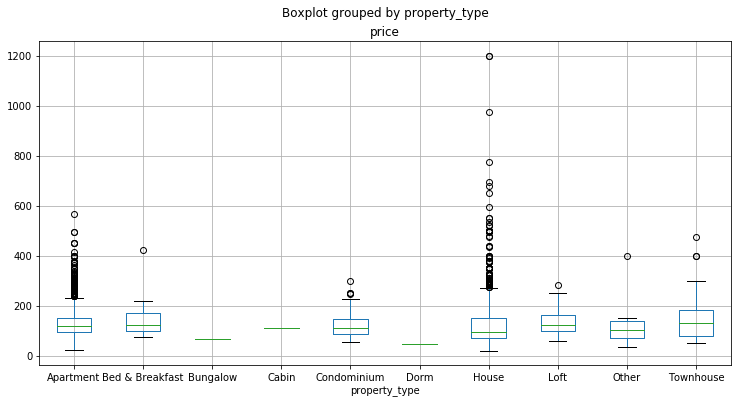

In [107]:
plt.rcParams['figure.figsize'] = (12,6)
df.boxplot(column=['price'], by='property_type');

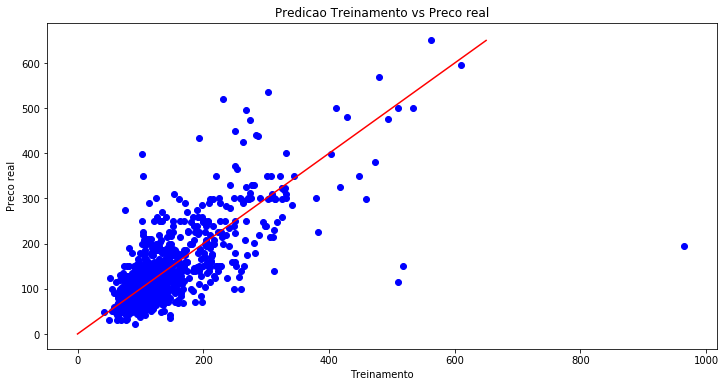

In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

#Implementando o modelo de regressao random forest

variaveis = []
variavel_preco = 'price'
for x in colunas_quant:
    if x != 'price':
        variaveis.append(x)
        
X_train, X_test, y_train, y_test = train_test_split(df[variaveis], df['price'], test_size=0.4, random_state=0)

regr = RandomForestRegressor(bootstrap = True, max_features = 'auto', n_estimators = 100)

regr.fit(X_train, y_train)

predicao1 = regr.predict(X_test)

y1 = np.max(y_test)
linha_adequada = np.linspace(0,y1, 10)
plt.plot(linha_adequada, linha_adequada, c = 'r')

plt.scatter(predicao1,y_test, c='b')
plt.title('Predicao Treinamento vs Preco real')
plt.ylabel('Preco real')
plt.xlabel('Treinamento')
plt.show()




In [236]:

print('O erro absoluto médio do df Teste é de: {0} '.format(mean_absolute_error(y_test,predicao1)))

O erro absoluto médio do df Teste é de: 35.95744545454546 
